## 1. 算法介绍

**支持向量机(Support Vector Machine, SVM)** 是一种强大的监督学习算法,广泛应用于分类和回归问题。SVM的主要目标是找到一个最优的超平面,将不同类别的数据点分开,同时最大化类别之间的间隔。

SVM的主要特点包括:

- 高效处理高维数据
- 通过核技巧处理非线性问题
- 泛化能力强
- 对异常点具有鲁棒性

## 2. 算法原理

### 2.1 线性可分情况

对于线性可分的数据,SVM试图找到一个最优的超平面,使得:

1. 正确分类所有训练样本
2. 最大化分类间隔(即支持向量到超平面的距离)

数学表达式如下:

最大化: $\frac{2}{||w||}$
约束条件: $y_i(w^Tx_i + b) \geq 1, i=1,2,...,n$

其中,$w$是超平面的法向量,$b$是偏置项,$x_i$是输入样本,$y_i$是类别标签。

![](https://files.mdnice.com/user/50822/c32f10ba-511c-4782-8a70-1084ba04c1cb.png)

### 2.2 非线性情况

对于非线性可分的数据,SVM使用核技巧将原始特征空间映射到高维空间,在高维空间中寻找线性分类边界。常用的核函数包括:

- 多项式核: $K(x_i, x_j) = (x_i^T x_j + c)^d$
- 高斯核(RBF): $K(x_i, x_j) = exp(-\gamma ||x_i - x_j||^2)$
- Sigmoid核: $K(x_i, x_j) = tanh(ax_i^T x_j + r)$


## 3. 案例分析: 鸢尾花分类

我们将使用著名的鸢尾花(Iris)数据集来演示SVM的应用。首先使用了鸢尾花数据集中的花瓣长度和宽度作为特征,训练一个SVM分类器来区分三种不同的鸢尾花品种。然后使用RBF核函数,最后并通过可视化展示SVM的决策边界。

准确率: 0.80


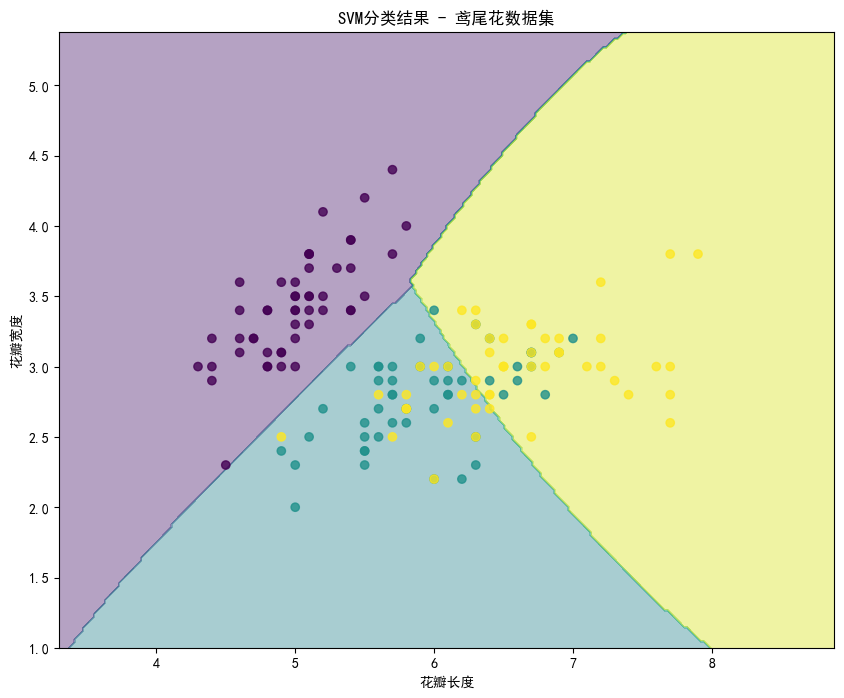

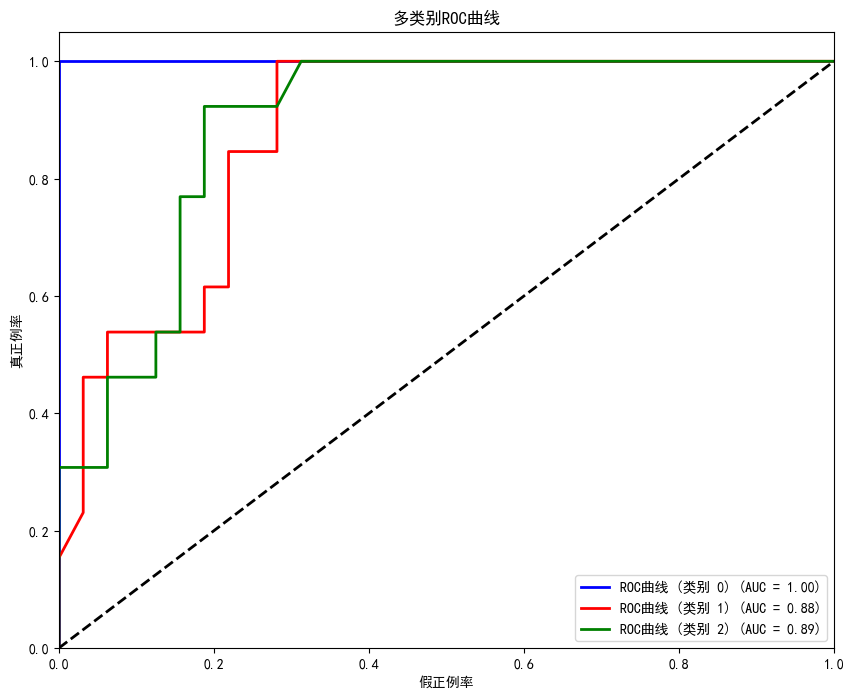

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载数据
iris = datasets.load_iris()
X = iris.data[:, [0, 1]]  # 只使用花瓣长度和宽度
y = iris.target

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建SVM分类器
svm_classifier = svm.SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

# 训练模型
svm_classifier.fit(X_train, y_train)

# 预测
y_pred = svm_classifier.predict(X_test)

# 计算准确率
accuracy = np.mean(y_pred == y_test)
print(f"准确率: {accuracy:.2f}")

# 可视化决策边界
def plot_decision_boundary(X, y, model, ax=None):
    if ax is None:
        ax = plt.gca()
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    ax.contourf(xx1, xx2, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    ax.set_xlabel('花瓣长度')
    ax.set_ylabel('花瓣宽度')
    return ax

plt.figure(figsize=(10, 8))
plot_decision_boundary(X, y, svm_classifier)
plt.title('SVM分类结果 - 鸢尾花数据集')
plt.show()

# 绘制ROC曲线
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = svm_classifier.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC曲线 (类别 {0}) (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率')
plt.ylabel('真正例率')
plt.title('多类别ROC曲线')
plt.legend(loc="lower right")
plt.show()